In [1]:
import os, sys
import pandas as pd
import pybedtools as pbt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append("/dors/capra_lab/users/fongsl/tools/py_/")
sys.path.append("/dors/capra_lab/users/fongsl/tools/genome/")
import config_readwrite as crw

In [2]:
alu_fa = "/data/hodges_lab/ATAC-STARR_B-cells/bin_human-evolution/repeatmasker/alusx.fa"

In [3]:
%%bash
cat /dors/capra_lab/users/fongsl/tools/genome/fasta_fimo.py

import os, sys, traceback
import argparse
import glob
import pandas as pd
from collections import Counter

# TO RUN

# python script [input_file] [sample_id] [-i]

# python /dors/capra_lab/fongsl/enh_age/bin/age_enhancers.py UBERON_0002372_tonsil_expressed_enhancers.bed UBERON0002372


###
#   arguments
###
arg_parser = argparse.ArgumentParser(description="Calculate enhancer age.")

arg_parser.add_argument("inputfile", type=str, help='.bed or .fa file w/ full path')

arg_parser.add_argument("sample_id", type=str, help='str label for files')

arg_parser.add_argument("genome_build", type=str, default="hg38", help='hg19 or hg38 (default)')

arg_parser.add_argument("-db", "--database", type=str, default="JASPAR",
                        help='JASPAR or Hocomoco meme db?')

args = arg_parser.parse_args()

INPUT_FILE = args.inputfile
SAMPLE_ID = args.sample_id
BUILD = args.genome_build
DB = args.database

TEST_PATH = "/".join(INPUT_FILE.split("/")[:-1])
RESULTS_PATH = f"{TEST_PATH}/tfbs_moti

In [4]:
PY_FIMO="/dors/capra_lab/users/fongsl/tools/genome/fasta_fimo.py"
cmd = f"python {PY_FIMO} {alu_fa} alusx_x_jaspar hg38 -db JASPAR"
os.system(cmd)

256

In [2]:
results = "/data/hodges_lab/ATAC-STARR_B-cells/bin_human-evolution/repeatmasker/tfbs_motif/alusx_x_jaspar/fimo_alusx_x_jaspar/fimo.txt"

In [3]:
df = pd.read_csv(results, sep = '\t').drop_duplicates()
df

,#pattern name,sequence name,start,stop,strand,score,p-value,q-value,matched sequence
0,MA1596.1,AluSx,173,188,-,28.48310,9.800000e-11,3.820000e-08,GCCTCAGCCTCCCGAG
1,MA1596.1,AluSx,205,220,-,25.44940,2.210000e-09,4.310000e-07,ACCTCCGCCTCCCGGG
2,MA1596.1,AluSx,38,53,-,22.87640,1.650000e-08,2.150000e-06,GCCTCGGCCTCCCAAA
3,MA1587.1,AluSx,39,52,-,19.08160,2.300000e-07,1.220000e-04,CCTCGGCCTCCCAA
4,MA0146.2,AluSx,43,56,-,17.74240,2.780000e-07,1.260000e-04,CCCGCCTCGGCCTC
...,...,...,...,...,...,...,...,...,...
123,MA0014.3,AluSx,266,277,+,10.49090,9.290000e-05,2.090000e-02,GAGCGAGACTCC
124,MA1630.2,AluSx,177,188,+,5.77528,9.710000e-05,2.480000e-02,GGAGGCTGAGGC
125,MA0682.2,AluSx,25,32,+,11.69390,9.770000e-05,2.980000e-02,GTAATCCC
126,MA0682.2,AluSx,160,167,+,11.69390,9.770000e-05,2.980000e-02,GTAATCCC


In [25]:
cols = ["#pattern name", "start", "stop", "strand", "q-value"]
plot = df.loc[df["score"]>10, cols].copy().drop_duplicates().reset_index().sort_values(by="q-value")

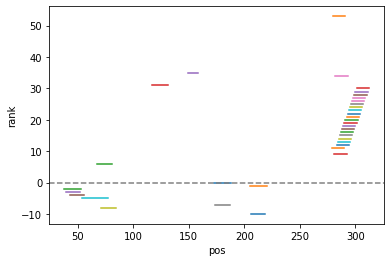

In [29]:
PLOT_TOP=35  # plot the top X motifs (based on q-value, which is biased by motif len)
v=0
for n, row in plot.iterrows():
    X= [row["start"], row["stop"]]

    if row["strand"] == "-":  # put negative strand ranks underneath the position
        n = -n
        
    y=[n,n]

    v+=1
    plt.plot(X, y)
    if v==PLOT_TOP:
        plt.axhline(0, ls= "--", color = "grey")
        plt.ylabel("rank")    
        plt.xlabel("pos")
        break
    

<AxesSubplot:xlabel='score', ylabel='Count'>

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


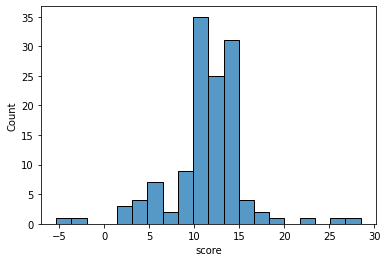

In [12]:
sns.histplot(df["score"])